<a href="https://colab.research.google.com/github/JatoJay/Hamoye-Data-Science-Internship/blob/master/Hamoye_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import prophet as Prophet

df=pd.read_csv("/content/drive/MyDrive/Time Series/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

df.rename(columns = {'FullDate':'Date'}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [7]:
#check for missing values
df.isnull().values.any()

False

Text(0, 0.5, 'GasPrice')

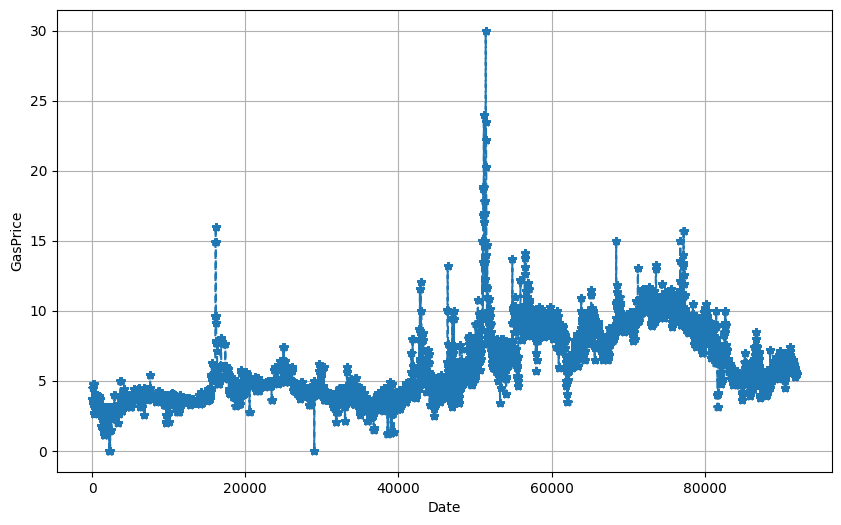

In [8]:

plt.figure(figsize=(10,6))
plt.plot(df.index, df.GasPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Date')
plt.ylabel('GasPrice')

Text(0, 0.5, 'ElecPrice')

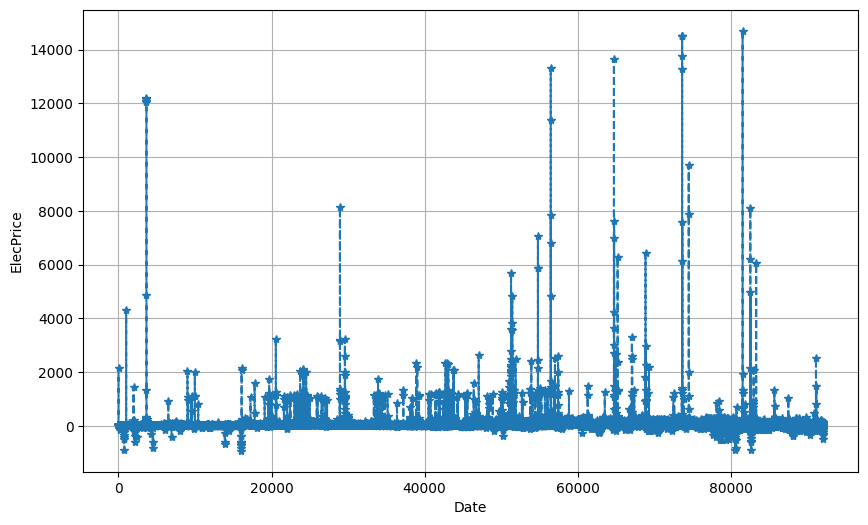

In [9]:
#df.set_index("Date", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Date')
plt.ylabel('ElecPrice')

In [10]:
df

,Date,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [11]:
dx = df[:2757]

dy = df[2758:]

In [12]:
dx

,Date,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
2752,2010-12-24 16:00:00,33.3,1799.49565,3.0988,36.770
2753,2010-12-24 17:00:00,33.3,1869.43815,3.0988,35.060
2754,2010-12-24 18:00:00,33.3,1836.26230,3.0988,27.980
2755,2010-12-24 19:00:00,33.3,1716.70845,3.0988,28.115


In [13]:
dy

,Date,Tmax,SysLoad,GasPrice,ElecPrice
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065
2762,2010-12-25 02:00:00,31.7,1039.40285,3.0988,17.450
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [14]:
'''# Create a new Prophet instance
from fbprophet import Prophet
model = Prophet()'''

'# Create a new Prophet instance\nfrom fbprophet import Prophet\nmodel = Prophet()'

In [15]:
'''# Rename columns to ds and y
df = df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})'''

"# Rename columns to ds and y\ndf = df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})"

In [16]:
df

,Date,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [17]:
'''# Fit the model on the dataset
model.fit(df)'''

'# Fit the model on the dataset\nmodel.fit(df)'

In [18]:
'''#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()'''

"#predict for the next 10 months\nfuture = model.make_future_dataframe(periods=10, freq='M')\nforecast = model.predict(future)\nforecast.head()"

In [19]:
'''forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()'''

"forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]\n#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries\nmodel.plot(forecast)\nplt.show()"

In [22]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826576 sha256=49b577461cec56c2600f9d27be6fb13db6e51cc7e7b1dcee76beb0601edf82d6
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement holidays==0.10.5 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6

In [23]:
# Create a new Prophet instance
from fbprophet import Prophet
model = Prophet()

In [24]:
# Rename columns to ds and y
df = dy.rename(columns={'Date': 'ds', 'ElecPrice': 'y'})

In [25]:
df

,ds,Tmax,SysLoad,GasPrice,y
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065
2762,2010-12-25 02:00:00,31.7,1039.40285,3.0988,17.450
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [26]:
# Convert ds to datetime format
df['ds'] = pd.to_datetime(df['ds'])

In [27]:
# Add regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')


In [28]:
# Fit the model on the dataset
model.fit(df)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [34]:
len(df['SysLoad'].values)

89258

In [32]:
len(df)

89258

In [35]:
len(df['Tmax'].values)

89258

In [36]:
len(df['GasPrice'].values)

89258

In [30]:
# Define the number of periods to predict
future_periods = 6

# Create a new dataframe with future dates to make predictions
future_dates = model.make_future_dataframe(periods=future_periods)

# Add regressor values to the future dataframe
future_dates['add1'] = df['SysLoad'].values
future_dates['add2'] = df['Tmax'].values
future_dates['add3'] = df['GasPrice'].values

# Use the model to make predictions for the future dates
forecast = model.predict(future_dates)


ValueError: ignored